In [11]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np

In [12]:
dataset_tranforms = transforms.Compose([
        transforms.Pad(2),
        transforms.ToTensor(),
    ]
)

In [13]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=dataset_tranforms)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=dataset_tranforms)

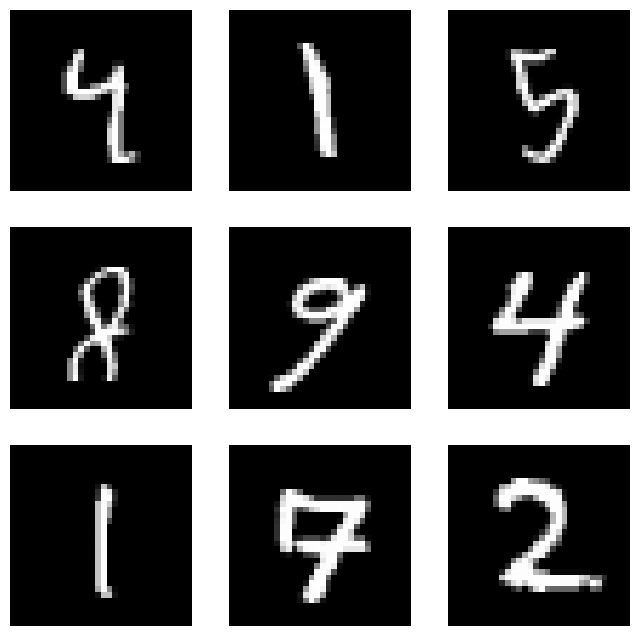

In [14]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_trainset), size=(1,)).item()
    img, label = mnist_trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [15]:
from data_loading import permute_train_test_data

In [16]:
training_permutations , test_permutations = permute_train_test_data(list(mnist_trainset)[:1000],list(mnist_testset)[:1000])

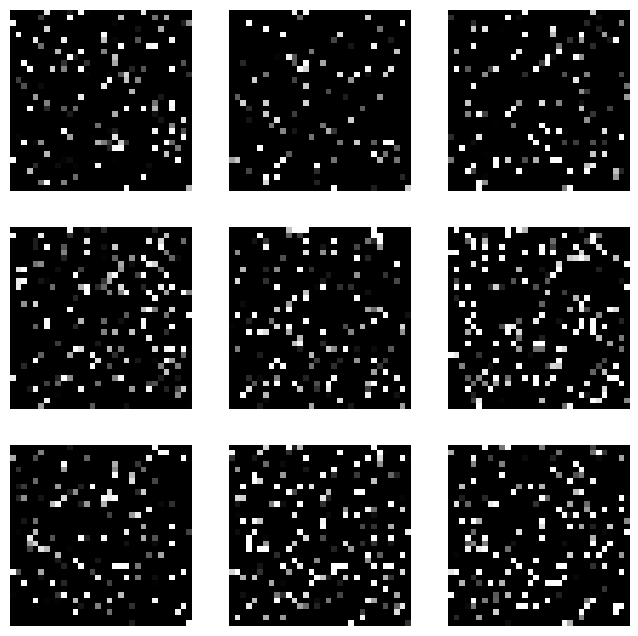

In [17]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_permutations[0]), size=(1,)).item()
    img, label = training_permutations[0][sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [18]:
from EWC_model import *
from train import * 

In [19]:
# -conv-layers
'''
        depth=depth,
        conv_type=args.conv_type if depth>0 else None,
        start_channels=args.channels if depth>0 else None,
        reducing_layers=args.rl if depth>0 else None,
        num_blocks=args.n_blocks if depth>0 else None,
        conv_bn=(True if args.conv_bn=="yes" else False) if depth>0 else None,
        conv_nl=args.conv_nl if depth>0 else None,
        no_fnl=True if depth>0 else None,
        global_pooling=checkattr(args, 'gp') if depth>0 else None,
'''
model = Classifier(
        image_size=32*32,
        image_channels=1,
        classes=10,
        # -fc-layers
        fc_units=1000,
        fc_drop=0.2,
        fc_layers = 4,
        fc_bn=True

    )

model

[LinearExcitability(in_features=1024, out_features=1000), LinearExcitability(in_features=1000, out_features=1000), LinearExcitability(in_features=1000, out_features=1000), LinearExcitability(in_features=1000, out_features=10)]


Classifier(
  (convE): ConvLayers(
    (pooling): Identity()
  )
  (flatten): Flatten()
  (fcE): MLP(
    (fcLayer1): fc_layer(
      (linear): LinearExcitability(in_features=1024, out_features=1000)
      (bn): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (nl): ReLU()
    )
    (fcLayer2): fc_layer(
      (dropout): Dropout(p=0.2, inplace=False)
      (linear): LinearExcitability(in_features=1000, out_features=1000)
      (bn): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (nl): ReLU()
    )
    (fcLayer3): fc_layer(
      (dropout): Dropout(p=0.2, inplace=False)
      (linear): LinearExcitability(in_features=1000, out_features=1000)
      (bn): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (nl): ReLU()
    )
  )
  (classifier): fc_layer(
    (dropout): Dropout(p=0.2, inplace=False)
    (linear): LinearExcitability(in_features=1000, out_features=10)
  )
)

In [20]:
model.fisher_n = None
model.fisher_labels = 'all'
model.fisher_batch = 1
# -options relating to 'Offline EWC' (Kirkpatrick et al., 2017) and 'Online EWC' (Schwarz et al., 2018)
model.offline = True
model.weight_penalty = True
model.reg_strength = 500

In [21]:
train_cl(model, training_permutations, iters=500, batch_size=256)

context:   0%|          | 0/10 [00:00<?, ?it/s]

1


accuracy for iteration  0  : 0.8421672952586207


accuracy for iteration  100  : 0.973700161637931


accuracy for iteration  200  : 0.9928609913793103


In [ ]:
for i, test_set in enumerate(tqdm(test_permutations)):
    test_loader = DataLoader(test_set,batch_size=256, shuffle=True)
    acc = []
    for batch_idx, (data, y) in enumerate(tqdm(test_loader)):
            # Perform training-step on this batch
            y_hat = model(data)
            acc.append((y == y_hat.max(1)[1]).sum().item() / data.size(0))
    print("Accuracy for context ", i , "is : ", np.mean(acc))

NameError: name 'tqdm' is not defined